### Projet Tutoré | Master 1 |  Groupe 1 

#### --------------------------------------------------

### Ce notebook permet de résoudre un problème lié à la assurance des voitures. Il permet de prédire le prix de l'assurance d'une voiture en fonction de plusieurs paramètres (les Etats, les collisions par conducteur...). L'algorithme utilisé ici est un algorithme de régression.


### Importation des librairies 

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np # Pour les opérations mathématiques sur les tableaux
import pandas as pd # Pour la manipulation des données tabulaires
import seaborn as sns # Pour la visualisation des données statistiques
import matplotlib.pyplot as plt # Pour la création de graphiques
import pycaret as py # Pour l'automatisation du machine learning


### Importation et lecture du dataset

In [ ]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv("data/bad-drivers3.csv")
# Afficher les cinq premières lignes des données
data.head()


,State,Number_billion_miles,Percentage_Speeding,Percentage_Alcohol,Percentage_Not_Distracted,Percentage_Accidents,Car_Insurance_Premiums,Losses_insured_driver
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Vérification du nombre de lignes et de colonnes du DataFrame

In [ ]:
# Afficher la dimension des données (nombre de lignes et de colonnes)
data.shape


(170, 8)

### Vérification de l'existance des colonnes vides dans le DataFrame

In [ ]:
# Afficher le nombre de valeurs manquantes par colonne
data.isna().sum()


State                        0
Number_billion_miles         0
Percentage_Speeding          0
Percentage_Alcohol           0
Percentage_Not_Distracted    0
Percentage_Accidents         0
Car_Insurance_Premiums       0
Losses_insured_driver        0
dtype: int64

### Statistique des données du DataFrame

In [ ]:
# Afficher les statistiques descriptives des variables numériques
data.describe()


,Number_billion_miles,Percentage_Speeding,Percentage_Alcohol,Percentage_Not_Distracted,Percentage_Accidents,Car_Insurance_Premiums,Losses_insured_driver
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,15.761176,31.835294,30.523529,86.300000,89.058824,888.136824,134.448706
std,4.054965,9.619196,5.044422,14.471294,6.882536,177.101592,24.292363
min,5.900000,13.000000,16.000000,10.000000,76.000000,641.960000,82.750000
25%,12.800000,23.000000,28.000000,84.000000,84.000000,768.950000,114.557500
50%,15.600000,34.000000,30.000000,89.000000,88.000000,858.970000,136.050000
75%,18.400000,38.000000,33.000000,95.000000,95.000000,1011.140000,151.480000
max,23.900000,54.000000,44.000000,100.000000,100.000000,1301.520000,194.780000


### Affichage de toutes les colonnes du DataFrame

In [ ]:
# Afficher les noms des colonnes des données
data.columns


Index(['State', 'Number_billion_miles', 'Percentage_Speeding',
       'Percentage_Alcohol', 'Percentage_Not_Distracted',
       'Percentage_Accidents', 'Car_Insurance_Premiums',
       'Losses_insured_driver'],
      dtype='object')

### Plot de  quelques colonnes du dataframe avec le target Car Insurance Premiums 

<Axes: xlabel='Percentage_Alcohol', ylabel='Car_Insurance_Premiums'>

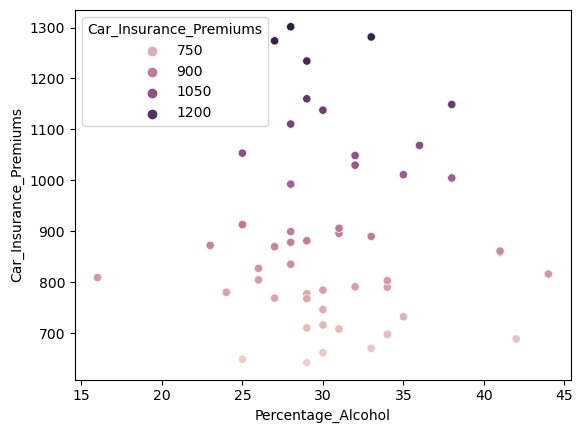

In [ ]:
# Afficher un nuage de points entre les variables "Percentage_Alcohol" et "Car_Insurance_Premiums"
# Utiliser la couleur pour représenter les valeurs de "Car_Insurance_Premiums"
sns.scatterplot(x="Percentage_Alcohol" ,y="Car_Insurance_Premiums", hue="Car_Insurance_Premiums", data=data)


<Axes: xlabel='Losses_insured_driver', ylabel='Car_Insurance_Premiums'>

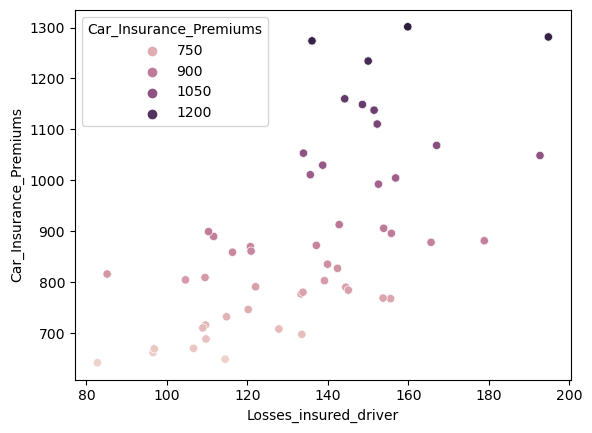

In [ ]:
# Afficher un nuage de points entre les variables "Losses_insured_driver" et "Car_Insurance_Premiums"
# Utiliser la couleur pour représenter les valeurs de "Car_Insurance_Premiums"
sns.scatterplot(x="Losses_insured_driver" ,y="Car_Insurance_Premiums", hue="Car_Insurance_Premiums", data=data)


In [ ]:
# Supprimer la colonne "State" des données
dataset = data.drop(["State"],axis=1)
# Afficher les cinq premières lignes du nouveau jeu de données
dataset.head()


,Number_billion_miles,Percentage_Speeding,Percentage_Alcohol,Percentage_Not_Distracted,Percentage_Accidents,Car_Insurance_Premiums,Losses_insured_driver
0,18.8,39,30,96,80,784.55,145.08
1,18.1,41,25,90,94,1053.48,133.93
2,18.6,35,28,84,96,899.47,110.35
3,22.4,18,26,94,95,827.34,142.39
4,12.0,35,28,91,89,878.41,165.63


### Tableau de corrélation

In [ ]:
# Calculer la matrice de corrélation entre les variables numériques
dataset.corr()


,Number_billion_miles,Percentage_Speeding,Percentage_Alcohol,Percentage_Not_Distracted,Percentage_Accidents,Car_Insurance_Premiums,Losses_insured_driver
Number_billion_miles,1.000000,-0.048921,0.173380,-0.001706,-0.031933,-0.212949,-0.047961
Percentage_Speeding,-0.048921,1.000000,0.319210,0.105734,0.000773,0.060080,-0.046866
Percentage_Alcohol,0.173380,0.319210,1.000000,0.025882,-0.255519,-0.012204,-0.070687
Percentage_Not_Distracted,-0.001706,0.105734,0.025882,1.000000,-0.167654,0.026527,-0.051563
Percentage_Accidents,-0.031933,0.000773,-0.255519,-0.167654,1.000000,0.093642,0.015807
Car_Insurance_Premiums,-0.212949,0.060080,-0.012204,0.026527,0.093642,1.000000,0.614833
Losses_insured_driver,-0.047961,-0.046866,-0.070687,-0.051563,0.015807,0.614833,1.000000


### Matrice de corrélation

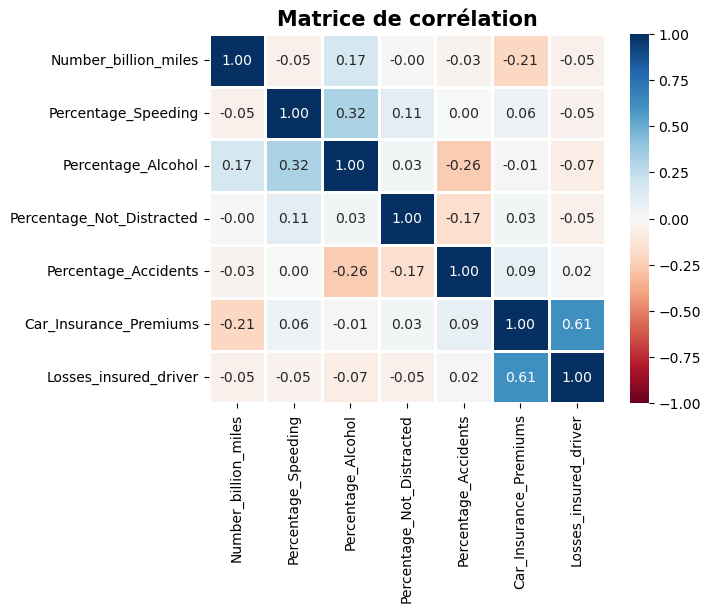

In [ ]:
# Afficher la matrice de corrélation sous forme de carte de chaleur
# Utiliser une palette de couleurs allant du rouge au bleu, centrée sur zéro
# Ajouter des lignes entre les cases et des annotations avec le format décimal
# Limiter l'échelle des couleurs entre -1 et 1
sns.heatmap(dataset.corr(), center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
# Ajouter un titre au graphique avec une taille et une épaisseur de police
plt.title("Matrice de corrélation", fontsize="15", fontweight="bold")
# Afficher le graphique
plt.show()


### Importation et utilisation de Pycaret

In [ ]:
# Importer le module de régression de pycaret
from pycaret.regression import*
# Initialiser l'environnement de pycaret avec le jeu de données et la variable cible
# Normaliser les données avec la méthode min-max
# Utiliser le GPU si disponible
s= setup(dataset,target="Car_Insurance_Premiums",normalize=True,normalize_method="minmax", use_gpu=True)


,Description,Value
0,Session id,362
1,Target,Car_Insurance_Premiums
2,Target type,Regression
3,Original data shape,"(170, 7)"
4,Transformed data shape,"(170, 7)"
5,Transformed train set shape,"(118, 7)"
6,Transformed test set shape,"(52, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


### Comparaison des modèles pour déterminer le meilleur modèle

In [ ]:
# Comparer les modèles de régression spécifiés dans la liste include
# Retourner le meilleur modèle selon la métrique R2
best_model = compare_models(include=['gbr','dt','et','rf','lightgbm'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,30.2793,6418.6629,58.5921,0.8011,0.0595,0.0307,1.5570
et,Extra Trees Regressor,21.9954,5279.6437,53.9248,0.7832,0.0542,0.0216,2.1920
rf,Random Forest Regressor,44.8121,6123.6243,68.0154,0.7400,0.0698,0.0474,2.6580
dt,Decision Tree Regressor,24.9742,8711.3720,68.3578,0.6573,0.0675,0.0243,0.8730
lightgbm,Light Gradient Boosting Machine,72.6684,11163.2885,101.3084,0.3870,0.1051,0.0785,1.8690


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

### Afficher le meilleur modèle

In [ ]:
# Afficher les informations du meilleur modèle
print(best_model)


GradientBoostingRegressor(random_state=362)


### Quelques plots du meilleur modèle

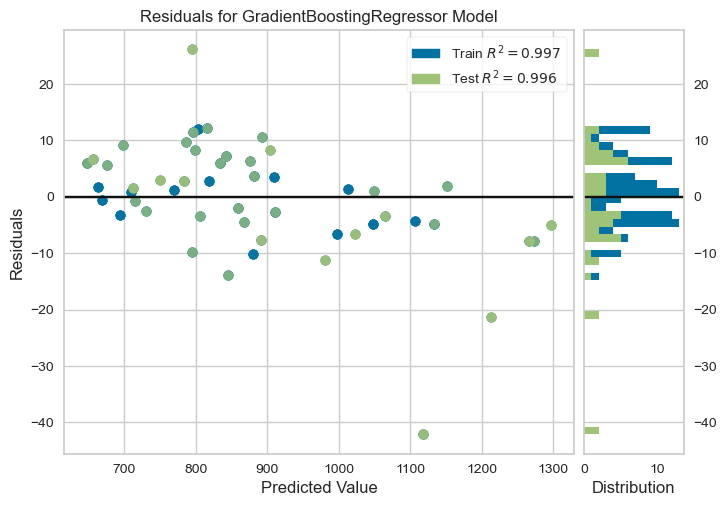

In [ ]:
# Afficher le graphique des résidus du meilleur modèle
plot_model(best_model,plot="residuals")


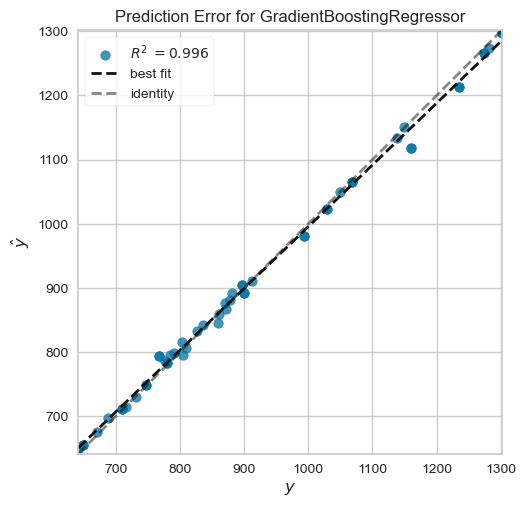

In [ ]:
# Afficher le graphique de l'erreur du meilleur modèle
plot_model(best_model,plot="error")


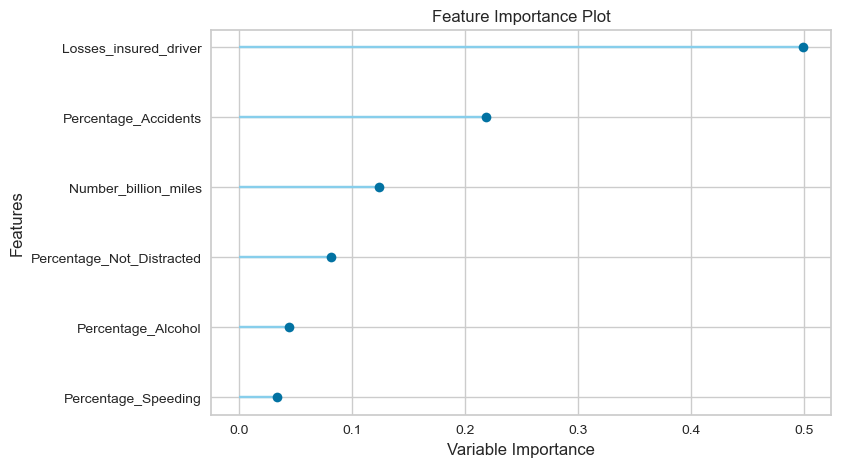

In [ ]:
# Afficher le graphique de l'importance des variables du meilleur modèle
plot_model(best_model,plot="feature")


### Création du modèle avec gbr

In [ ]:
# Créer un modèle de régression avec le gradient boosting
lr = create_model("gbr")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,111.9709,37500.0788,193.6494,0.1559,0.1835,0.0936
1,12.0335,310.5522,17.6225,0.9696,0.0223,0.0149
2,19.1373,1894.9708,43.5313,0.9436,0.0453,0.0221
3,9.1652,345.5554,18.5891,0.9865,0.0177,0.0103
4,35.0029,9038.8740,95.0730,0.6866,0.1029,0.0431
5,28.1458,2907.5301,53.9215,0.7072,0.0573,0.0329
6,44.7899,10583.4121,102.8757,0.6717,0.0922,0.0389
7,9.8418,114.6718,10.7085,0.9851,0.0144,0.0131
8,10.3408,194.3844,13.9422,0.9847,0.0173,0.0130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### optimisation du modèle avec optuna

In [ ]:
# Affiner le modèle de régression avec le gradient boosting
# Utiliser la bibliothèque optuna pour la recherche des hyperparamètres
tune_gbr =tune_model(lr,search_library ="optuna")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.1780,35552.0608,188.5525,0.1997,0.1768,0.0828
1,1.5043,24.0357,4.9026,0.9977,0.0066,0.0020
2,15.6546,2878.1556,53.6484,0.9144,0.0544,0.0175
3,0.0640,0.0272,0.1649,1.0000,0.0001,0.0001
4,16.8003,3299.7571,57.4435,0.8856,0.0664,0.0218
5,39.2856,9111.6890,95.4552,0.0825,0.0960,0.0446
6,18.9026,4269.7927,65.3437,0.8676,0.0551,0.0145
7,0.1795,0.0976,0.3125,1.0000,0.0004,0.0002
8,0.0564,0.0052,0.0723,1.0000,0.0001,0.0001


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-07-06 06:34:57,022] Searching the best hyperparameters using 118 samples...
[I 2023-07-06 06:38:02,335] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Entrainement du modèle

In [ ]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = dataset.drop(['Car_Insurance_Premiums'],axis=1)
y = dataset['Car_Insurance_Premiums']
# Afficher les variables explicatives
X


,Number_billion_miles,Percentage_Speeding,Percentage_Alcohol,Percentage_Not_Distracted,Percentage_Accidents,Losses_insured_driver
0,18.8,39,30,96,80,145.08
1,18.1,41,25,90,94,133.93
2,18.6,35,28,84,96,110.35
3,22.4,18,26,94,95,142.39
4,12.0,35,28,91,89,165.63
...,...,...,...,...,...,...
165,15.3,36,29,85,98,82.75
166,12.8,36,34,94,96,139.15
167,14.5,25,29,95,95,108.92
168,15.7,17,25,97,87,114.47


In [ ]:
# Importer la fonction de division des données de sklearn
from sklearn.model_selection import train_test_split
# Diviser les données en ensemble d'apprentissage (80%) et de test (20%)
# Utiliser un état aléatoire fixe pour la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
# Entraîner le modèle de régression avec le gradient boosting sur l'ensemble d'apprentissage
lr.fit(X_train,y_train)


GradientBoostingRegressor(random_state=362)

In [ ]:
# Prédire les valeurs de la variable cible sur l'ensemble d'apprentissage
y_pred_train =lr.predict(X_train)
# Afficher les valeurs prédites
y_pred_train


array([ 900.12582808,  806.87473491,  649.75947352,  793.90060153,
       1145.77430925, 1222.01091266,  888.36688411,  880.41863023,
        714.2617156 , 1029.43955088,  899.86441333,  907.40231897,
       1066.525231  ,  987.78836701,  654.59321407,  804.3333389 ,
        908.9193802 ,  784.18372094, 1048.46802766,  713.01329082,
        888.36688411,  793.90060153, 1048.46802766,  882.66125026,
        817.44339542,  649.75947352, 1011.0184272 , 1001.40185633,
        654.59321407,  665.77419913,  840.53073508,  654.59321407,
        817.24489025,  747.26313703,  713.01329082,  812.5647885 ,
        677.48415427, 1048.46802766,  689.58223443,  665.77419913,
        817.44339542, 1133.86367171, 1271.92558322, 1045.56903944,
       1107.65018781,  654.59321407,  899.86441333,  791.52585309,
        670.28723701,  649.75947352,  817.44339542,  793.90060153,
       1133.86367171, 1145.77430925,  871.94188038, 1001.40185633,
        817.24489025,  806.87473491,  835.83033915,  812.56478

In [ ]:
# Prédire les valeurs de la variable cible sur l'ensemble de test
y_pred_test =lr.predict(X_test)
# Afficher les valeurs prédites
y_pred_test


array([ 649.75947352,  835.83033915,  908.9193802 , 1271.92558322,
        779.75599487,  710.78781684,  817.24489025, 1029.43955088,
        791.52585309,  782.31379417,  812.5647885 ,  791.66470311,
        900.12582808,  714.2617156 ,  839.40046024, 1296.21045291,
       1222.01091266, 1045.56903944,  860.93789892, 1029.43955088,
        784.18372094,  782.31379417, 1066.525231  ,  791.66470311,
       1107.65018781,  860.93789892, 1011.0184272 ,  908.9193802 ,
        987.78836701,  840.53073508,  677.48415427, 1133.86367171,
       1011.0184272 ,  806.87473491])

### Metrics d'évaluation

In [ ]:
# Importer les fonctions pour calculer les mesures d'évaluation
from sklearn.metrics import mean_squared_error,r2_score

# Calculer le coefficient de détermination (r2) sur les données d'entraînement
r2_train = r2_score(y_train,y_pred_train)
# Afficher le résultat
print("r2 du train : ", r2_train)

# Calculer l'erreur quadratique moyenne (mse) sur les données d'entraînement
mse_train = mean_squared_error(y_train,y_pred_train)
# Afficher le résultat
print("mse du train : ",mse_train)


r2 du train :  0.9974767317931896
mse du train :  79.7035494115826


In [ ]:
# Importer la classe pour créer un modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Instancier un objet de la classe LinearRegression
regressor = LinearRegression()

# Ajuster le modèle aux données d'entraînement
regressor.fit(X_train,y_train)


LinearRegression()

### Prédiction du test

In [ ]:
# Faire des prédictions sur les données de test
y_pred_test =regressor.predict(X_test)

# Afficher les valeurs prédites
y_pred_test


array([ 692.86868013,  852.09078531,  914.15696143, 1129.4496547 ,
        813.3435515 ,  801.8604491 ,  638.38137197,  935.57848272,
        758.28517684,  924.68195359,  928.43358371,  971.95526458,
        767.87475754,  827.21324101,  941.44149028,  976.30683391,
        948.82850958,  870.14667475,  748.91167726,  935.57848272,
        889.00784651,  924.68195359, 1077.48971333,  971.95526458,
        924.78336556,  748.91167726,  963.98897698,  914.15696143,
        875.62474058,  734.26318259,  735.09458974,  911.40568928,
        963.98897698,  824.28739295])

In [ ]:
# Importer les fonctions pour calculer les mesures d'évaluation
from sklearn.metrics import mean_squared_error, r2_score

# Calculer l'erreur quadratique moyenne (rmse) sur les données d'entraînement et de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculer le coefficient de détermination (r2) sur les données d'entraînement et de test
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Afficher les résultats
print("RMSE du train:", train_rmse)
print("RMSE du test:", test_rmse)


RMSE du train: 8.92768443727614
RMSE du test: 140.8439941595616


In [ ]:
# Importer la fonction pour faire de la validation croisée
from sklearn.model_selection import cross_val_score

# Importer la fonction pour calculer l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error

# Faire de la validation croisée avec 5 plis sur le modèle de régression linéaire et les données d'entraînement
# Utiliser le score négatif de l'erreur quadratique moyenne comme critère d'évaluation
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculer la racine carrée des scores négatifs pour obtenir les scores de RMSE
rmse_scores = np.sqrt(-scores)

# Afficher les scores de RMSE pour chaque pli
print("RMSE scores:", rmse_scores)

# Calculer la moyenne des scores de RMSE
print("Mean RMSE:", rmse_scores.mean())


RMSE scores: [26.31945439 23.62538367 52.97103915 25.98235248 12.20282655]
Mean RMSE: 28.22021124644242


### Sauvegarde du modèle 

In [ ]:
# Importer le module pickle pour sauvegarder le modèle
import pickle

# Ouvrir un fichier en mode écriture binaire
with open('gbr.pkl', 'wb') as file:
     # Sauvegarder le modèle de régression linéaire dans le fichier
     pickle.dump(lr, file)


### Création de l'application

In [ ]:
create_app(lr)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
